In [1]:
using Pkg
import Pkg; Pkg.add("PrettyTables")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


1024×1024 Matrix{ComplexF64}:
  0.0266097+0.0236356im    …   -0.0110094-0.0157701im
  0.0220312+0.0196113im         0.0257214+0.0149646im
 0.00575735+0.00975283im       -0.0231868-0.00687864im
 0.00843989+0.0371117im         0.0202337-0.018584im
  0.0344639+0.0172801im         0.0014301-0.00675583im
  0.0256516+0.0045484im    …  -0.00378666+0.0268467im
  0.0059246+0.0231833im         0.0110071-0.0382358im
  0.0307984+0.0242059im       0.000908515+0.0509099im
  0.0201025+0.00721069im       -0.0508944-0.0192641im
  0.0259764+0.00205965im       -0.0378192-0.0125373im
           ⋮               ⋱  
  0.0374799+0.00464624im   …   -0.0171192+0.00223698im
  0.0146517+0.0053588im       -0.00259179-0.00874157im
  0.0351289+0.0348866im        -0.0028686-0.00991584im
   0.025724+0.0344836im        -0.0274466+0.0382742im
  0.0175506+0.0228944im         0.0123147+0.0264302im
   0.026154+0.0374943im    …  -0.00256985-0.026666im
   0.029052+0.0177153im        0.00450819-0.0192946im
 0.00911986+0.0104

Approximate Identity Matrix:4.772069781293714e-14


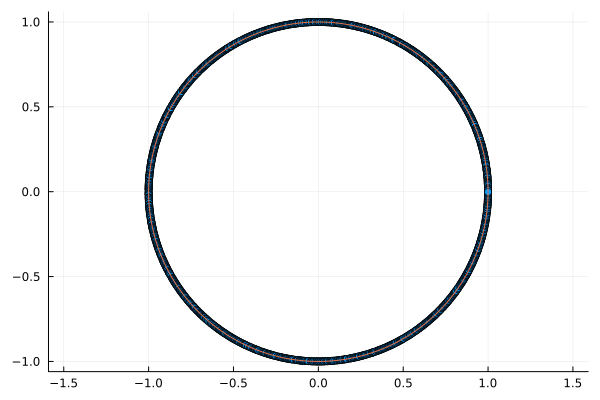

In [1]:

using Random
using LinearAlgebra
using Plots
using PrettyTables
N = 1024
A = rand(N, N)
B = rand(N, N)
Z = A + im * B

Q, R = qr(Z)
M = zeros(N, N) 
for i = 1:N
    for j = 1:N
        if i == j
            M[i, j] = R[i, j] / abs(R[i, j])
        else
            M[i, j] = 0
        end
    end
end
H = Q * M
display(H)
I_approx = H * H'
println("Approximate Identity Matrix:", norm(I - I_approx))
eigenvalues = eigvals(H)
scatter(real(eigenvalues), imag(eigenvalues), legend=true, ratio=1)
plot!(cos.(LinRange(0, 2π, 1000)), sin.(LinRange(0, 2π, 1000)), legend=false)

In [2]:
open("/Users/arya/Documents/Python/DATA/Haar.txt", "w") do file
    for i = 1:N
    
            real_part = real(H[1, i])
            imag_part = imag(H[1, i])
            write(file, "$real_part + $imag_part im\n")
    end
end